#### `Inequality constrained` optimization

For `twice-differentiable` convex functions $f_i$, we want to

$$\min f_0(x), \text{s.t. } f_i(x)\leq 0, i=1, \cdots, m, \,Ax=b$$

where $A\in \mathbf{R}^{p \times n}, \, \text{rank }A=p$, and $p^*$ is optimal value

Assume the problem is `strictly feasible`, therefore strong duality holds (Slater's condition)

Examples include LP, QP, QCQP, etc.

#### Objective of interior point method

The idea of interior point methods is to `convert` solving an inequality constrained problem into solving a `sequence of small number` of unconstrained or equality constrained problems (which we know how to solve, e.g., Newton's method)

#### Log-barrier function

Define log-barrier function $\phi(x)$ as

$$\phi(x)=-\sum_{i=1}^m \log (-f_i(x)), \text{dom }\phi=\{x|f_1(x)<0,\cdots,f_m(x)<0\} $$

We can transform the original problem as

$$\min f_0(x)+\frac{1}{t}\phi(x), \text{s.t. } Ax=b$$

where $t>0$

This is because as $f_i(x)$ approches 0 (from negative), the penalty increases drastically, making sure $x$ actually never reaches the boundary

The approximation improves as $t\rightarrow \infty$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

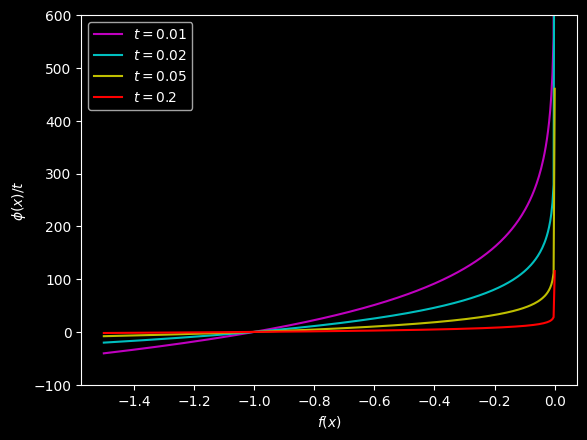

In [ ]:
def log_barrier(fx, t):
    return -np.log(-fx)/t

x = np.linspace(-1.5, -1e-10, 400)

plt.plot(x, log_barrier(x, 0.01), label="$t=0.01$", linestyle='-', color='m')
plt.plot(x, log_barrier(x, 0.02), label="$t=0.02$", linestyle='-', color='c')
plt.plot(x, log_barrier(x, 0.05), label="$t=0.05$", linestyle='-', color='y')
plt.plot(x, log_barrier(x, 0.2), label="$t=0.2$", linestyle='-', color='r')

plt.xlabel("$f(x)$")
plt.ylabel("$\phi(x)/t$")
plt.ylim(-100, 600)
plt.legend()
plt.show()

This is now an equality constrained problem and the objective function is twice differentiable with

$$\begin{align*}
\nabla \phi(x)&=\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla f_i(x) \\
\nabla^2 \phi(x)&=\sum_{i=1}^m\frac{1}{f_i(x)^2}\nabla f_i(x)\nabla f_i(x)^T+\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla^2 f_i(x)
\end{align*}$$


#### Centering problem and central path

For $t>0$, let $x^*(t)$ as the solution of the `centering problem`

$$\min tf_0(x)+\phi(x), \text{s.t. } Ax=b$$

the `central path` is defined as the trajectory that traces the solution as $t$ changes

$$\{x^*(t)|t>0\}$$

(when $t=0$, the objective is to minimize the log-barrier function, which would keep $x$ as far away from each boundary as possible and the solution $x^*(0)$ is known as the `analytic center` of the polyhedron)

#### Optimality condition and Lagrangian

For point on central path $x^*(t), t>0$, we can write the optimality condition of the `centering problem` (plug in the gradient of $\phi(x)$)

$$\begin{align*}Ax&=b, \,\, t\nabla f_0(x)+\nabla \phi(x)+A^Tw=0 \\ \Longrightarrow Ax&=b, \,\, \nabla f_0(x)+\sum_{i=1}^m\frac{1}{-tf_i(x)}\nabla f_i(x)+\frac{1}{t}A^Tw=0
\end{align*}$$

We also write out the Lagrangian of the `original inequality constrained problem`

$$L(x, \lambda, \nu)=f_0(x)+\sum_{i=1}^m\lambda_i f_i(x)+\nu^T(Ax-b)$$

Take gradient w.r.t. $x$ and set to zero

$$\nabla f_0(x)+\sum_{i=1}^m\lambda_i \nabla f_i(x)+A^T\nu=0$$

We see that $x^*(t)$ `minimizes the Lagrangian` for $\lambda, \nu$ given by

$$\lambda^*_i(t)=\frac{1}{-tf_i(x^*(t))}>0, i=1, \cdots, m, \, \nu^*(t)=\frac{w}{t}$$

#### Duality gap on central path

Therefore, by minimizing the centering problem to get $x^*(t)$ (e.g., through Newton's method), we also inadvertently have a point $\lambda^*, \nu^*$ that is dual feasible, which immediately gives a `lower bound` of optimal value to original problem $p^*$

More specifically, through Lagrange dual function $g(\lambda, \nu)$, we have

$$\begin{align*}
f_0(x^*(t))\geq p^*\geq g(\lambda^*(t), \nu^*(t))&=\inf_{x\in D} L(x, \lambda^*(t), \nu^*(t))\\
&=L(x^*(t),\lambda^*(t), \nu^*(t))\\
& \text{plug these into Lagrangian expression}\\
&=f_0(x^*(t))+\sum_{i=1}^m\lambda_i^*(t) f_i(x^*(t))+(\nu^{*}(t))^T(Ax^*(t)-b) \\
& x^*(t)\text{ must satisfy the equality constraints, so } Ax^*(t)=b\\
&=f_0(x^*(t))+\sum_{i=1}^m\lambda_i^*(t) f_i(x^*(t))\\
& \text{plug in } \lambda^*_i(t)=\frac{1}{-tf_i(x^*(t))}\\
&=f_0(x^*(t))-\frac{m}{t}
\end{align*}$$

$f_0(x^*(t))\geq p^*$ holds because $p^*$ is optimal value of the original inequality constrained problem with objective function $f_0(x)$ and $x^*(t)$ is feasible for this problem

This indicates that with $x^*(t)$, $f_0(x^*(t))$ would be `no more than` $\frac{m}{t}$ suboptimal for the original problem

#### KKT conditions

From above, we see that on central path, $x^*, \lambda^*, \nu^*$ almost satisfy the KKT conditions

* primal feasibility $f_i(x^*)\leq 0, i=1, \cdots, m,\, Ax^*=b$
* dual feasibility $\lambda^*\geq 0$
* `approximate` complementary slackness $-\lambda_i^*f_i(x^*)=1/t$
* vanishing gradient
$$\nabla f_0(x^*)+\sum_{i=1}^m\frac{1}{-tf_i(x^*)}\nabla f_i(x^*)+\frac{1}{t}A^T\nu^*=0$$


#### Barrier method

Given strictly feasible $x, t=t^0>0, \mu>1$ ($\mu$ typically in 10-20)

* compute $x^*(t)$ by solving centering problem (e.g., using Newton's method starting at current $x$)
* $x \leftarrow x^*(t)$
* if $m/t< \epsilon$, quit
* $t \leftarrow \mu t$

#### Feasibility problem

We need to compute a `strictly feasible starting point` for barrier method

Find $x$, such that $f_i(x)< 0, i=1, \cdots, m, \, Ax=b$

##### Basic method

$$\min_{x, s} s\,\,\, \text{s.t. } f_i(x)\leq s, i=1, \cdots, m, Ax=b$$

* if $x, s$ feasible, with $s<0$, $x$ is strictly feasible for feasibility problem
* if optimal $s$ is positive, then feasibility problem is infeasible
* if zero and attained, then feasibility problem is feasible (but not strictly)
* if zero, not attained, then feasibility problem is infeasible

##### Sum of infeasibilities

$$\min_{x, s} 1^Ts\,\,\, \text{s.t. } f_i(x)\leq s_i,, s_i\geq 0, i=1, \cdots, m, Ax=b$$